In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps
import json



In [2]:
def load_json(path):
    with open(path, 'r') as f:
        data = json.load(f)
    return data

In [56]:

def AUCError(errors, failureThreshold=0.08, step=0.0001, showCurve=False):
    nErrors = len(errors)
    xAxis = list(np.arange(0., failureThreshold + step, step))
    ced = [float(np.count_nonzero([errors <= x])) / nErrors for x in xAxis]
    AUC = simps(ced, x=xAxis) / failureThreshold
    failureRate = 1. - ced[-1]
    print("AUC @ {0}: {1}".format(failureThreshold, np.round(AUC, 3)))
    print("Failure rate: {0}".format(np.round(failureRate, 3)))
    if showCurve:
        fig, ax = plt.subplots(figsize=(10,8))
        plt.title('Area Under Curve')
        plt.xlabel('Normalized Localization Error(%)',  fontsize=12)
        plt.ylabel('Cumulative Error Distribution',  fontsize=12)
        plt.ylim([0, 1])
        plt.plot(np.asarray(xAxis) * 100, ced, color='red')
        plt.grid()
        plt.show()

In [58]:
path = '/aidata/anders/objects/landmarks/metrics/nle.json'
annos = load_json(path)

In [64]:
nle = np.asarray(annos['nle'])
num_samples = annos['num_samples']
interocular = annos['interocular']
mean_interocular = np.mean(interocular).astype(np.float16)
print(mean_interocular)

216.6


AUC @ 0.08: 0.717
Failure rate: 0.144


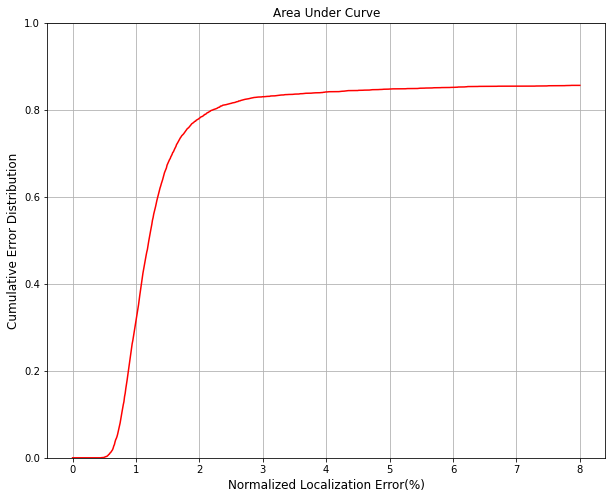

In [60]:
AUCError(nle, showCurve = True)
# Eval_type  countour  left_eye  right_eye    nose       lip
# accuracy     0.577  0.794500   0.717000  0.7665  0.685625